In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\DELL XPS\Desktop\skillenable\ML\Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

step


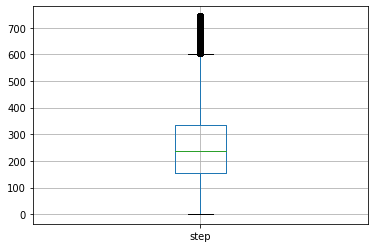

amount


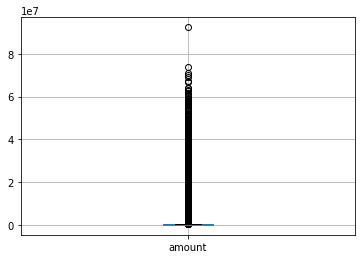

oldbalanceOrg


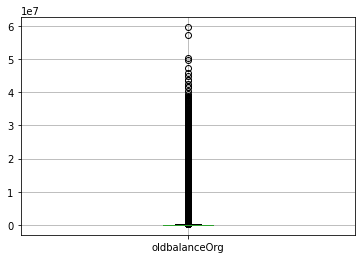

newbalanceOrig


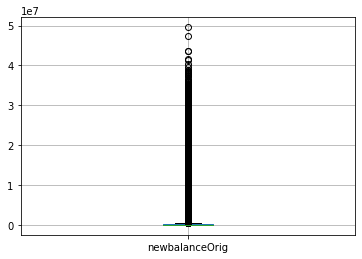

oldbalanceDest


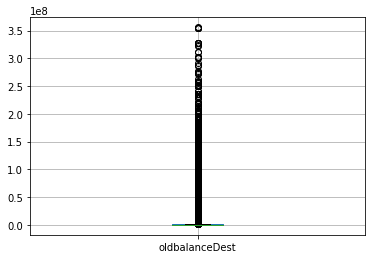

newbalanceDest


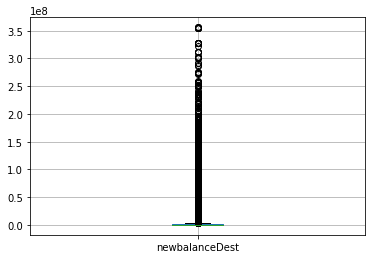

isFraud


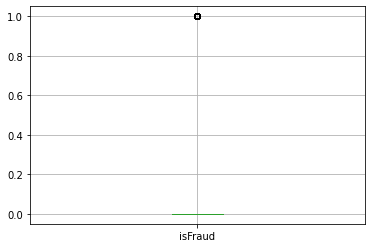

isFlaggedFraud


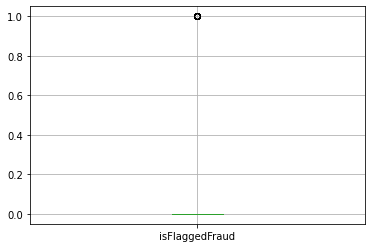

In [6]:
for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        print(col)
        data.boxplot(column = col)
        plt.show()
    else:
        pass

In [8]:
correlation_matrix=data.corr()

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_32716\575618102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


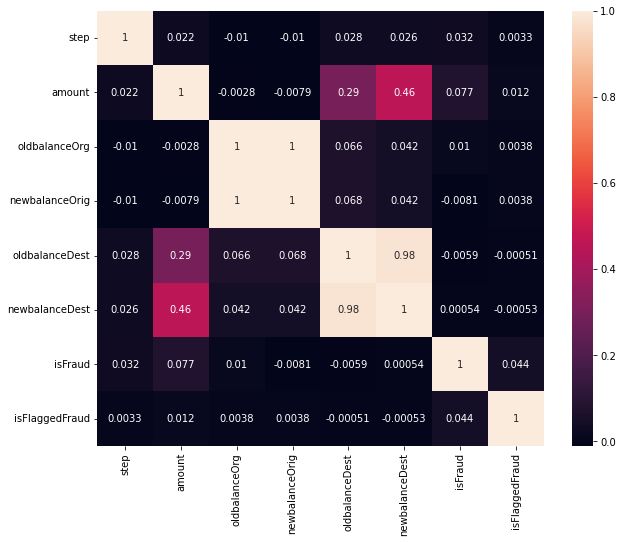

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [10]:
data['balanceChangeOrig']= data['newbalanceOrig']-data['oldbalanceOrg']
data['balanceChangeDest']= data['newbalanceDest']-data['oldbalanceDest']

In [11]:
data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   nameOrig           object 
 4   nameDest           object 
 5   isFraud            int64  
 6   isFlaggedFraud     int64  
 7   balanceChangeOrig  float64
 8   balanceChangeDest  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 436.9+ MB


C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_32716\3387264778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


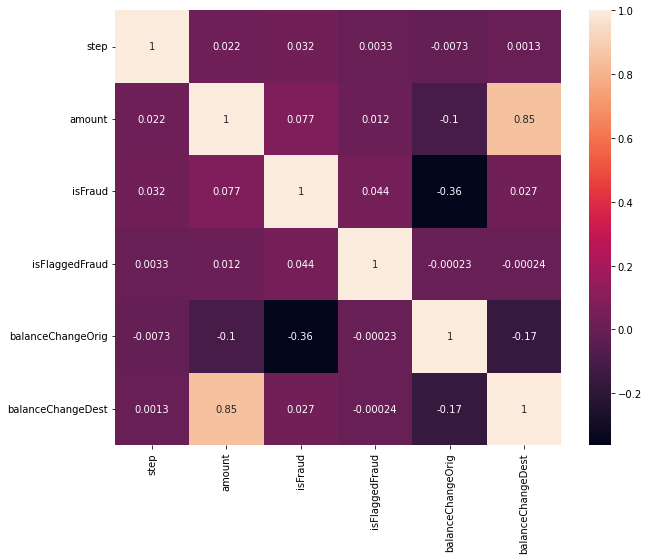

In [13]:
correlation_matrix=data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [16]:
encoded_types = pd.get_dummies(data['type'], prefix='type')
data= pd.concat([data, encoded_types], axis=1)
data.drop(['type'], axis=1, inplace=True)

In [17]:
data.head()

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,M1979787155,0,0,-9839.64,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,M2044282225,0,0,-1864.28,0.0,0,0,0,1,0
2,1,181.00,C1305486145,C553264065,1,0,-181.00,0.0,0,0,0,0,1
3,1,181.00,C840083671,C38997010,1,0,-181.00,-21182.0,0,1,0,0,0
4,1,11668.14,C2048537720,M1230701703,0,0,-11668.14,0.0,0,0,0,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['nameOrig'] = labelencoder.fit_transform(data['nameOrig'])
data['nameDest'] = labelencoder.fit_transform(data['nameDest'])

In [19]:
data.head()

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,1662094,0,0,-9839.64,0.0,0,0,0,1,0
1,1,1864.28,2188998,1733924,0,0,-1864.28,0.0,0,0,0,1,0
2,1,181.00,1002156,439685,1,0,-181.00,0.0,0,0,0,0,1
3,1,181.00,5828262,391696,1,0,-181.00,-21182.0,0,1,0,0,0
4,1,11668.14,3445981,828919,0,0,-11668.14,0.0,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
x= data.drop(['isFraud'],axis=1)
y= data['isFraud']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
metrics.accuracy_score(y_test,y_pred_lr)

0.9989894100229151

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
metrics.accuracy_score(y_test,y_pred_dtc)

0.9994153351921063

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
metrics.accuracy_score(y_test,y_pred_rfc)